# target 1(분류): Position
- y: position(FW,MD,DF,GK)
- X: 능력치(Crossing ~ GKReflexes)


# 문제 이해 데이터 처리

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./FIFA2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18159 non-null  object 
 1   Age                       18159 non-null  int64  
 2   Nationality               18159 non-null  object 
 3   Overall                   18159 non-null  int64  
 4   Potential                 18159 non-null  int64  
 5   Club                      17918 non-null  object 
 6   Value                     18159 non-null  int64  
 7   Wage                      18159 non-null  int64  
 8   Special                   18159 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

## 널값 검사

In [3]:
data.loc[:, 'Crossing':'GKReflexes'].isnull().sum()

Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [4]:
data.loc[:, 'Position simplified'].isnull().sum()

0

## 라벨링

In [5]:
map_position = {'FW':0, 'MD':1, 'DF':2, 'GK':3}
col = ['Position simplified']
data[col] = data[col].applymap(map_position.get)
data['Position simplified']

0        0
1        0
2        0
3        3
4        1
        ..
18154    1
18155    0
18156    0
18157    0
18158    1
Name: Position simplified, Length: 18159, dtype: int64

## 데이터의 상관관계

In [6]:
X = data.loc[:, 'Crossing':'GKReflexes']
y = data.loc[:, 'Position simplified']
xy = pd.concat([X, y], axis=1)

<AxesSubplot:>

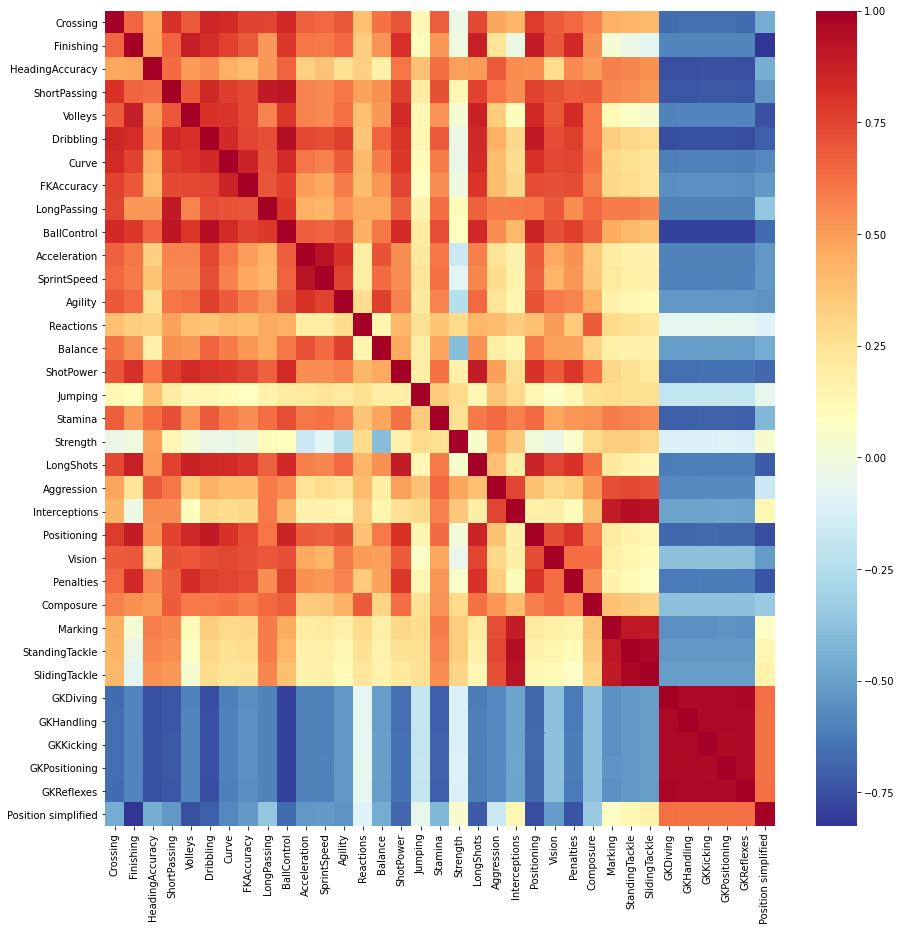

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 15))
sns.heatmap(xy.corr(), cmap='RdYlBu_r')

<AxesSubplot:xlabel='Positioning', ylabel='Density'>

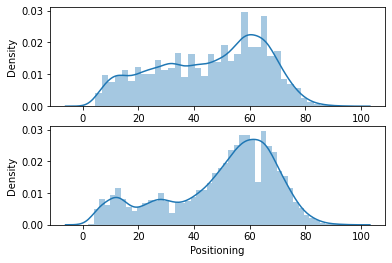

In [8]:
plt.subplot(211)
sns.distplot(data['Finishing'])
plt.subplot(212)
sns.distplot(data['Positioning'])

<AxesSubplot:xlabel='StandingTackle', ylabel='Density'>

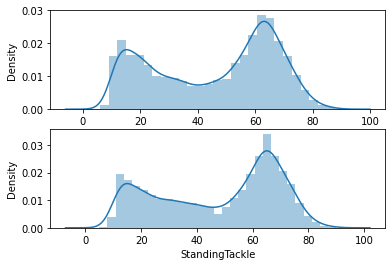

In [9]:
plt.subplot(211)
sns.distplot(data['SlidingTackle'])
plt.subplot(212)
sns.distplot(data['StandingTackle'])

<AxesSubplot:xlabel='GKDiving', ylabel='Density'>

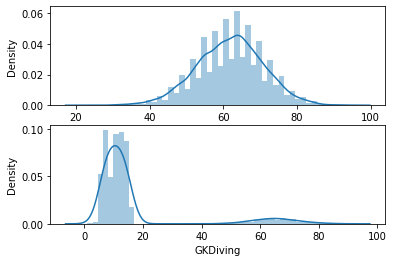

In [10]:
plt.subplot(211)
sns.distplot(data['Reactions'])
plt.subplot(212)
sns.distplot(data['GKDiving'])

# 학습 데이터 생성

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# 모델 결정
- 결정 트리, 랜덤 포레스트, SVM, lightGBM, xgboost 사용

In [12]:
print('힉습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_train.shape[0]*100)

힉습 데이터 레이블 값 비율
1    37.652427
2    32.302730
0    18.826214
3    11.218630
Name: Position simplified, dtype: float64
테스트 데이터 레이블 값 비율
1    16.143498
2    13.846275
0     8.063882
3     4.806860
Name: Position simplified, dtype: float64


In [13]:
def get_model_train_eval(model, X_train=None, X_test=None, y_train=None, y_test=None):
    model.fit(X_train, y_train)
    print('{} Test Accuracy: {}%'.format(model, round(model.score(X_test, y_test)*100, 2)))


    pred_model = model.predict(X_test)
    print('{} report:{}\n'.format(model, classification_report(y_test, pred_model)))

## 결정트리

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
get_model_train_eval(dt, X_train, X_test, y_train, y_test)

DecisionTreeClassifier() Test Accuracy: 81.15%
DecisionTreeClassifier() report:              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1025
           1       0.75      0.76      0.76      2052
           2       0.86      0.85      0.86      1760
           3       1.00      1.00      1.00       611

    accuracy                           0.81      5448
   macro avg       0.84      0.84      0.84      5448
weighted avg       0.81      0.81      0.81      5448




In [15]:
import graphviz
from sklearn import tree

dt.fit(X_train, y_train)
dot_data = tree.export_graphviz(
    decision_tree=dt,
    feature_names=X.columns,
    class_names='Position simplified',
    filled=True, rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

## 랜덤포레스트

In [16]:
rf = RandomForestClassifier()
get_model_train_eval(rf, X_train, X_test, y_train, y_test)

RandomForestClassifier() Test Accuracy: 87.92%
RandomForestClassifier() report:              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1025
           1       0.83      0.87      0.85      2052
           2       0.92      0.92      0.92      1760
           3       1.00      1.00      1.00       611

    accuracy                           0.88      5448
   macro avg       0.90      0.89      0.89      5448
weighted avg       0.88      0.88      0.88      5448




## XGBoost

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
get_model_train_eval(xgb, X_train, X_test, y_train, y_test)


[08:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) Test Accuracy: 88.0%
XGBClassifier(base_score=0.5, booster='gbtree', c

In [18]:
import multiprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier())
])

param_grid = [{
    'model__n_estimators':[300, 400, 500],
    'model__learning_rate':[0.3, 0.4, 0.5],
    'model__maxd_epth':[3,4,5,6]
}]

grid_model_xgb = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=3,
    verbose=True
)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 108 out of 108 | elapsed: 17.1min finished
[08:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { maxdepth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                

In [22]:
model = grid_model_xgb.best_estimator_

In [23]:
get_model_train_eval(model, X_train, X_test, y_train, y_test)

[09:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { maxdepth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                       

## LightGBM

In [24]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
get_model_train_eval(lgbm, X_train, X_test, y_train, y_test)


LGBMClassifier() Test Accuracy: 87.83%
LGBMClassifier() report:              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1025
           1       0.82      0.86      0.84      2052
           2       0.93      0.92      0.92      1760
           3       1.00      1.00      1.00       611

    accuracy                           0.88      5448
   macro avg       0.90      0.89      0.89      5448
weighted avg       0.88      0.88      0.88      5448




In [42]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier())
])

param_grid = [{
    'model__n_estimators':[300, 400, 500],
    'model__learning_rate':[0.3, 0.4, 0.5],
    'model__max_depth':[3,4,5,6]
}]

grid_model_lgb = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=3,
    verbose=True
)

grid_model_lgb.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   50.3s
[Parallel(n_jobs=8)]: Done 108 out of 108 | elapsed:  2.5min finished
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LGBMClassifier())]),
             n_jobs=8,
             param_grid=[{'model__learning_rate': [0.3, 0.4, 0.5],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__n_estimators': [300, 400, 500]}],
             verbose=True)

In [43]:
grid_model_lgb.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LGBMClassifier(learning_rate=0.4, max_depth=6,
                                n_estimators=400))])

In [44]:
get_model_train_eval(grid_model_lgb, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   53.9s
[Parallel(n_jobs=8)]: Done 108 out of 108 | elapsed:  2.7min finished
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LGBMClassifier())]),
             n_jobs=8,
             param_grid=[{'model__learning_rate': [0.3, 0.4, 0.5],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__n_estimators': [300, 400, 500]}],
             verbose=True) Test Accuracy: 87.78%
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LGBMClassifier())]),
             n_jobs=8,
             param_grid=[{'model__learning_rate': [0.3, 0.4, 0.5],
                          'model__max_depth': [3, 4, 5, 6],

## SVM

In [39]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear')
polynoimal_svc = SVC(kernel='poly')
rbf_svc = SVC(kernel='rbf')

get_model_train_eval(linear_svc,  X_train, X_test, y_train, y_test)
get_model_train_eval(polynoimal_svc,  X_train, X_test, y_train, y_test)
get_model_train_eval(rbf_svc, X_train, X_test, y_train, y_test)

SVC(kernel='linear') Test Accuracy: 87.44%
SVC(kernel='linear') report:              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1025
           1       0.82      0.87      0.84      2052
           2       0.92      0.90      0.91      1760
           3       0.99      1.00      0.99       611

    accuracy                           0.87      5448
   macro avg       0.89      0.88      0.89      5448
weighted avg       0.88      0.87      0.87      5448


SVC(kernel='poly') Test Accuracy: 87.74%
SVC(kernel='poly') report:              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1025
           1       0.81      0.88      0.85      2052
           2       0.93      0.92      0.92      1760
           3       1.00      1.00      1.00       611

    accuracy                           0.88      5448
   macro avg       0.90      0.88      0.89      5448
weighted avg       0.88      0.88      0.88   

In [40]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf'))
])

param_grid = [{
    'model__gamma':['scale', 'auto'],
    'model__C':[1.0, 0.1, 0.01]
}]

grid_model_svc = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=3,
    verbose=True
)

grid_model_svc.fit(X, y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:   57.9s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [41]:
get_model_train_eval(grid_model_svc, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:   31.9s finished
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True) Test Accuracy: 88.09%
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True) report:              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1025
           1       0.82  

In [49]:
import numpy as np

def make_meshgrid(x,y,h=.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy, = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h),
    )
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contour(xx, yy, Z, **params)
    
    return out


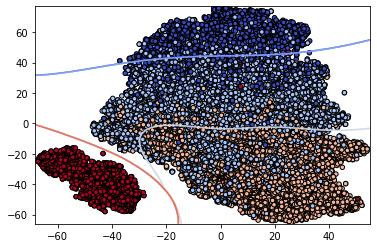

In [53]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

model = grid_model_svc.best_estimator_
model.fit(X_train, y_train)

X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## AutoML 사용

In [25]:
from pycaret.classification import *

data = pd.read_csv('./FIFA2.csv')
XX = data.loc[:, 'Crossing':'GKReflexes']
yy = data.loc[:, 'Position simplified']

data_auto = pd.concat([XX, yy], axis=1)
clf = setup(data=data_auto, target='Position simplified', train_size=0.7, session_id=10)

In [26]:
best4models = compare_models(sort='Accuracy', n_select=4, fold=3)

In [27]:
stracker = stack_models(estimator_list=best4models[1:], meta_model=best4models[0], fold=3)

In [ ]:
from pycaret.classification import *

data = pd.read_csv('./FIFA2.csv')
XX = data.loc[:, 'Crossing':'GKReflexes']
yy = data.loc[:, 'Position simplified']

data_auto = pd.concat([XX, yy], axis=1)
clf = setup(data=data_auto, target='Position simplified', train_size=0.7, session_id=10)

In [ ]:
stracker = stack_models(estimator_list=best4models[1:], meta_model=best4models[0], fold=3)

In [42]:
y

0        0
1        0
2        0
3        3
4        1
        ..
18154    1
18155    0
18156    0
18157    0
18158    1
Name: Position simplified, Length: 18159, dtype: int64